<a href="https://colab.research.google.com/github/romi2002/semanatec_analitica/blob/main/6_3_Actividad_Regresion_Linea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad

Abiel Fernandez, A01197654

Javier Corrales, A01742328

Karla Justine Acosta Pedraza A00834005

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

# Importante: 
- Colocar nombre en ejes en gráficas
- Nombre en gráficas 
- Conclusiones con el nombre de cada alumno
- Contestar cada pregunta


#**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

drive.mount('/content/drive/')
%cd 'drive/MyDrive/SemanaTec'
df = pd.read_csv('data/presion.csv')

sns.set()
df.head()

Mounted at /content/drive/
/content/drive/MyDrive/SemanaTec


,edad,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión ( alta y baja) 


Text(0.5, 1.0, 'Presión alta vs edad')

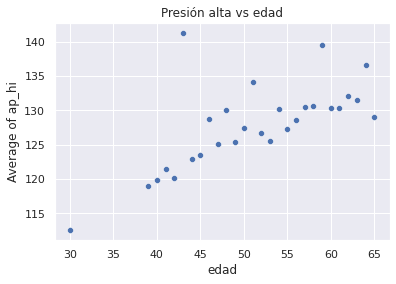

In [ ]:
# alta
plt.figure()
sns.scatterplot(data=df, x='edad', y='Average of ap_hi').set_title('Presión alta vs edad')

Text(0.5, 1.0, 'Presión baja vs edad')

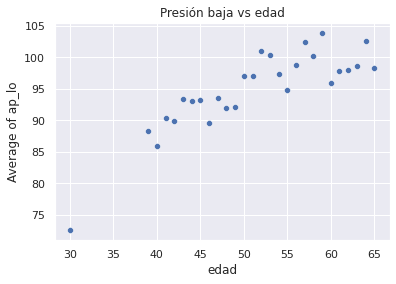

In [ ]:
# baja
plt.figure()
sns.scatterplot(data=df, x='edad', y='Average of ap_lo').set_title("Presión baja vs edad")

3. Genera una regresión líneal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**.

¿Cuál es el valor de a y cuál es el valor de b para la presión alta y baja?

In [ ]:
# alta
lm_alta = LinearRegression()
lm_alta.fit(df[['edad']], df['Average of ap_hi'])
print(f"A: {lm_alta.coef_}, B:{lm_alta.intercept_}")

A: [0.47769703], B:103.3969740964366


In [ ]:
# baja
lm_baja = LinearRegression()
lm_baja.fit(df[['edad']], df['Average of ap_lo'])
print(f"A: {lm_baja.coef_}, B:{lm_baja.intercept_}")

A: [0.60898106], B:63.726200409422745


4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


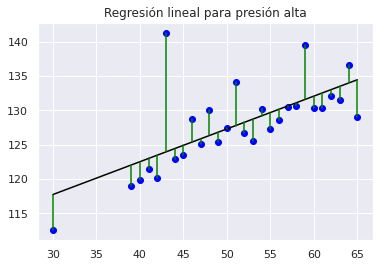

In [ ]:
# alta
fig = plt.figure()

x = df['edad']
y = df['Average of ap_hi']
model = lm_alta

plt.scatter(x, y, color='blue')

xfit = np.linspace(x.min(), x.max(), 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit, color='black')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color='green')
plt.title("Regresión lineal para presión alta")
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


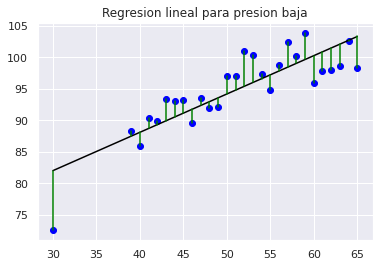

In [ ]:
# baja
fig = plt.figure()

x = df['edad']
y = df['Average of ap_lo']
model = lm_baja

plt.scatter(x, y, color='blue')

xfit = np.linspace(x.min(), x.max(), 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit, color='black')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color='green')
plt.title("Regresion lineal para presion baja")
fig.show()

5. ¿Cuál es la presión arterial hi y lo esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [ ]:
edad_calcular=76

def presionLo(edad):
  return lm_baja.predict([[edad]])[0]

presionLo(edad_calcular)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


110.00876081923334

In [ ]:
def presionHi(edad):
  return lm_alta.predict([[edad]])[0]

presionHi(edad_calcular)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


139.70194835946515

6. Conclusiones 

 matrícula- Nombre alumno : detalle





#Opcion: **Gastos en seguro**

Nuestro objetivo será construir un modelo que nos permita estimar los gastos de seguro dependiendo de edad,sexo, indice de masa corporal, numero de hijos, si se fuma, región.

El dataset consta de las columnas: 
- age: edad del beneficiario principal
- sex: female o male 
- bmi: indice de masa corporal
- children: numero de niños que estan cubiertos con la poliza. 
- smoke: si fuma el beneficiario si/no
- region: región en dónde vive el beneficiario. Estos datos son de Estados Unidos. Regiones disponibles: northeast, southeast, southwest, northwest
- charges: costo del seguro.


Referencia de dataset: 
https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

1.a. Carga los datos del archivo insurance.csv 

In [ ]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1.b. Crea unas columnas con las siguientes caracteristicas:
- fuma: 1 si el bvalor de smoke es "yes" y 0 si el valor de smoke es "no" 
- region: si es northeast - 0 , southeast- 1, southwest- 2, northwest - 3
- sexo: 0 si es "male" y 1 si es "female"

In [ ]:
df['fuma'] = df['smoker'].map({'yes':1, 'no':0})
df['region'] = df['region'].map({'northeast': 0, 'southeast':1, 'southwest':2, 'northwest':3})
df['sexo'] = df['sex'].map({'male':0, 'female':1})
df.head()

,age,sex,bmi,children,smoker,region,charges,fuma,sexo
0,19,female,27.900,0,yes,2,16884.92400,1,1
1,18,male,33.770,1,no,1,1725.55230,0,0
2,28,male,33.000,3,no,1,4449.46200,0,0
3,33,male,22.705,0,no,3,21984.47061,0,0
4,32,male,28.880,0,no,3,3866.85520,0,0


2. Generar una(s) grafica(s) para visuaizar cómo se relaciona cada columna de costo en seguro contra otras variables.

Text(0.5, 1.0, 'Correlación entre variables')

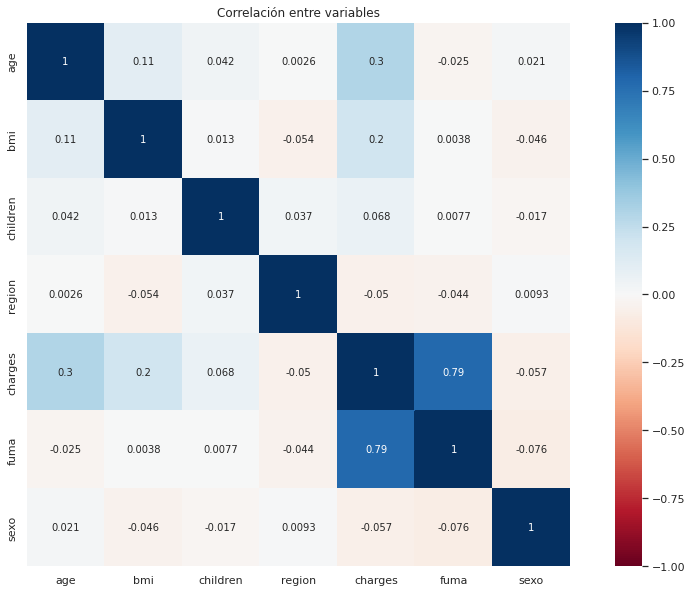

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='RdBu', square=True, annot=True).set_title("Correlación entre variables")

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

El precio y la variable fuma tienen una relación fuerte positiva. Con esto se puede predecir que si un cliente fuma tiene una probabilidad alta de que el precio del seguro sea relativamente alto. Tambièn, se observa que el precio tiene una relación positiva con la edad del cliente.

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para **Edad vs Costo** , **Indice de masa corporal vs Costo** , **Niños vs Costo** y otros? \\

*Los valores obtenidos de beta se observan en la siguiente pregunta*

In [ ]:
def score_adj(X, y, model):
    return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

def calc_lm(x, y):
  lm = LinearRegression()
  lm.fit(x,y)

  print(f"B0: {lm.intercept_}, B1:{lm.coef_}, Score:{lm.score(x, y).round(6)}, Score Adj: {score_adj(x,y,lm).round(6)}")

Text(0.5, 1.0, 'Precio vs. variables')

<Figure size 1440x720 with 0 Axes>

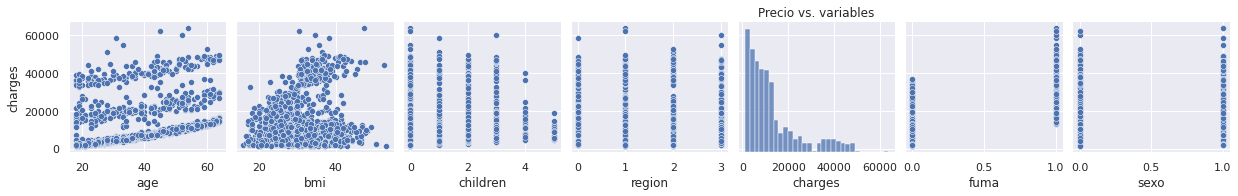

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(data=df, y_vars=['charges'])
plt.title("Precio vs. variables")

5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?


In [ ]:
print("Fuma vs Costo")
calc_lm(df[['fuma']], df['charges'])

print("Edad vs Costo")
calc_lm(df[['age']], df['charges'])

print("BMI vs Costo")
calc_lm(df[['bmi']], df['charges'])

print("Ninos vs Costo")
calc_lm(df[['children']], df['charges'])

print("Region vs Costo")
calc_lm(df[['region']], df['charges'])

Fuma vs Costo
B0: 8434.2682978562, B1:[23615.96353368], Score:0.619765, Score Adj: 0.61948
Edad vs Costo
B0: 3165.885006063021, B1:[257.72261867], Score:0.089406, Score Adj: 0.088724
BMI vs Costo
B0: 1192.9372089611497, B1:[393.8730308], Score:0.039339, Score Adj: 0.03862
Ninos vs Costo
B0: 12522.495549644098, B1:[683.08938248], Score:0.004624, Score Adj: 0.003879
Region vs Costo
B0: 14088.745390518741, B1:[-550.48584301], Score:0.002523, Score Adj: 0.001776


*Escibe aquí...*.

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado de de 5 combinaciones . Ejemplo: **Edad, Niños, Region vs Costo** ?

In [ ]:
def calc_lmm(Xs, y):
  lm = LinearRegression()
  lm.fit(Xs, y)
  print(f"Betas: {lm.coef_.round(2)} Score: {lm.score(Xs,y).round(6)} Score adj: {score_adj(Xs, y, lm).round(6)}")

def format_lmm(labels):
  print(f"{', '.join(l.capitalize() for l in labels)} vs. Costo")
  calc_lmm(df[labels], df['charges'])

format_lmm(['age', 'children', 'region'])
format_lmm(['bmi', 'fuma', 'age'])
format_lmm(['sexo', 'age', 'children'])
format_lmm(['region', 'sexo', 'bmi'])
format_lmm(['sexo', 'region', 'children'])

Age, Children, Region vs. Costo
Betas: [ 255.74  576.04 -581.99] Score: 0.095285 Score adj: 0.093251
Bmi, Fuma, Age vs. Costo
Betas: [  322.62 23823.68   259.55] Score: 0.747477 Score adj: 0.746909
Sexo, Age, Children vs. Costo
Betas: [-1515.11   256.86   545.16] Score: 0.096382 Score adj: 0.09435
Region, Sexo, Bmi vs. Costo
Betas: [ -429.86 -1160.5    385.22] Score: 0.043191 Score adj: 0.041039
Sexo, Region, Children vs. Costo
Betas: [-1346.7   -572.46   692.71] Score: 0.010499 Score adj: 0.008274


 7. ¿Cuál modelo es el que nos conviene elegir?

El mejor modelo es el de Bmi, Fuma, Edad vs Cost, ya que tiene un score ajustado de 0.7469, el cual es el mayor de los scores ajustados que se comparó.

## Conclusiones
##### A01197654 - Abiel Fernandez : 

La ciencia de datos nos permite observar el comportamiento y realizar predicciones con base en nuestros datos. El saber cómo automatizar el proceso de limpieza y graficado de datos es extremadamente útil para poder facilitar la toma de decisiones dentro de alguna empresa. En este ejemplo, se pudo crear un modelo de regresión que nos pueda ayudar a predecir el costo para cualquier cliente. Además, al analizar la correlación entre los datos, se observa cuales son las variables que más influyen sobre el precio final, la cual en este caso era si el cliente fumaba o no. Si se quisiera mejorar el modelo obtenido, se debe buscar recolectar más variables que tengan una mayor correlación con el costo final. Por ejemplo, se pudiera intentar agregar alguna variable cuantitativa que representa la cantidad de condiciones médicas pre-existentes que pudieran llegar a poner al cliente en riesgo.

##### A01742328 - Javier Eduardo Corrales Cardoza : \\

Mediante lo relizado anteriormente se puede observar la importancia de la manipuacion de los datos para la prediccion o pronostico de los fenomenos ocurridos en diferentes areas. El tabular, visualizar y relacionar los datos y variables es fundamental para el entendimiento de la informacion, y la elaboracion de modelos. Aplicado a este ejemplo, se puede observar como las variables de las cuales se tiene informacion, afectan en mayor o menor medida al precio del seguro medico, por casos como este se resalta la importancia de las variables, pues en el caso mencionado anteriormente, no todas las variables estaban igual de relacionadas, haciendo que los diferentes modelos variaran significativamente entre si. Finalmente gracias a la manipulacion de la informacion se pudo determinar las variablles de mayor importancia y hacer las debidas predicciones con respecto a ello, es decir, se logro el objetivo.